In [1]:
# import and initialize otter
import otter
grader = otter.Notebook("p13.ipynb")

In [2]:
import public_tests

In [3]:
# PLEASE FILL IN THE DETAILS
# enter none if you don't have a project partner
# you will have to add your partner as a group member on Gradescope even after you fill this

# project: p13
# submitter: sheberlein
# partner: sheberlein  

 # Project 13: World University Rankings

## Learning Objectives:

In this project, you will demonstrate how to:

* query a database using SQL,
* process data using `pandas` **DataFrames**,
* create different types of plots.

Please go through [Lab-P13](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f23-projects/-/tree/main/lab-p13) before working on this project. The lab introduces some useful techniques related to this project.

<h2 style="color:red">Warning (Note on Academic Misconduct):</h2>

**IMPORTANT**: **P12 and P13 are two parts of the same data analysis.** You **cannot** switch project partners between these two projects. That is if you partnered up with someone for P12, you have to sustain that partnership until the end of P13.

**You are  not allowed to use any late days for P13, even if you have late days remaining in your late days bank.** Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/f23/syllabus.html).

Under any circumstances, **no more than two students are allowed to work together on a project** as mentioned in the course policies. If your code is flagged by our code similarity detection tools, **both partners will be responsible** for sharing/copying the code, even if the code is shared/copied by one of the partners with/from other non-partner student(s). Note that each case of plagiarism will be reported to the Dean of Students with a zero grade on the project. **If you think that someone cannot be your project partner then don’t make that student your lab partner.**

**<font color = "red">Project partners must submit only one copy of their project on Gradescope, but they must include the names of both partners.</font>**

## Testing your code:

Along with this notebook, you must have downloaded the files `public_tests.py` and `expected_dfs.html`. If you are curious about how we test your code, you can explore this file, and specifically the output of the function `get_expected_json`, to understand the expected answers to the questions.

For answers involving DataFrames, `public_tests.py` compares your tables to those in `expected_dfs.html`, so take a moment to open that file on a web browser (from Finder/Explorer). `public_tests.py` doesn't care if you have extra rows or columns, and it doesn't care about the order of the rows or columns. However, you must have the correct values at each index/column location shown in `expected_dfs.html`.

**IMPORTANT Warning:** Do **not** download the dataset `rankings.json` **manually**. Use the `download` function from P12 to download it. When we run the autograder, this file `rankings.json` will **not** be in the directory. So, unless your `p13.ipynb` downloads these files, the Gradescope autograder will **deduct** points from your public score.

## Project Description:

For your final CS220 project, you're going to continue analyzing world university rankings. However, we will be using a different dataset this time. The data for this project has been extracted from [here](https://www.topuniversities.com/university-rankings/world-university-rankings). Unlike the CWUR rankings we used in P12, the QS rankings dataset has various scores for the universities, and not just the rankings. This makes the QS rankings dataset more suitable for plotting (which you will be doing a lot of!).

In this project, you'll have to dump your DataFrame to a SQLite database. You'll answer questions by doing queries on that database. Often, your answers will be in the form of a plot. Check these carefully, as the tests only verify that a plot has been created, not that it looks correct (the Gradescope autograder will manually deduct points for plotting mistakes).

## Project Requirements:

You **may not** hardcode indices in your code. You **may not** manually download **any** files for this project, unless you are **explicitly** told to do so. For all other files, you **must** use the `download` function to download the files.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

#### Required Functions:
- `download`
- `bar_plot`
- `scatter_plot`
- `horizontal_bar_plot`
- `pie_plot`
- `get_regression_coeff`
- `get_regression_line`
- `regression_line_plot`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

#### Required Data Structures:
- `conn`

You **must** write SQL queries to solve the questions in this project, unless you are **explicitly** told otherwise. You will **not get any credit** if you use `pandas` operations to extract data. We will give you **specific** instructions for any questions where `pandas` operations are allowed. In addition, you are also **required** to follow the requirements below:

* You **must** close the connection to `conn` at the end of your notebook.
* Do **not** use **absolute** paths such as `C://mdoescher//cs220//p13`. You may **only** use **relative paths**.
* Do **not** hardcode `//` or `\` in any of your paths. You **must** use `os.path.join` to create paths.
* Do **not** leave irrelevant output or test code that we didn't ask for.
* **Avoid** calling **slow** functions multiple times within a loop.
* Do **not** define multiple functions with the same name or define multiple versions of one function with different names. Just keep the best version.

For more details on what will cause you to lose points during code review and specific requirements, please take a look at the [Grading rubric](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f23-projects/-/blob/main/p13/rubric.md).

## Questions and Functions:

Let us start by importing all the modules we will need for this project.

In [4]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import sqlite3
import pandas as pd
import matplotlib
import math
import numpy as np # this is *only* for the function get_regression_coeff - do NOT use this module elsewhere
import requests
import os

In [5]:
# this ensures that font.size setting remains uniform
%matplotlib inline 
pd.set_option('display.max_colwidth', None)
matplotlib.rcParams["font.size"] = 13 # don't use value > 13! Otherwise your y-axis tick labels will be different.

Now, you may copy/paste some of the functions and data structures you defined in Lab-P13 and P12, which will be useful for this project.

In [6]:
# copy/paste the definition of the function 'bar_plot' from lab-p13 here
def bar_plot(df, x, y):
    """bar_plot(df, x, y) takes in a DataFrame 'df' and displays 
    a bar plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis"""
    
    # TODO: use df.plot.bar to plot the data in black with no legend
    hi = df.plot.bar(x, y)
    # TODO: set x as the x label 
    hi.set_xlabel(x)
    # TODO: set y as the y label
    hi.set_ylabel(y)

In [7]:
grader.check("bar_plot")

bar_plot results: All test cases passed!
bar_plot - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data is not plotted correctly (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
bar_plot - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'legend is not deleted or axes are not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [8]:
# copy/paste the definition of the function 'scatter_plot' from lab-p13 here
def scatter_plot(df, x, y):
    """scatter_plot(df, x, y) takes in a DataFrame 'df' and displays 
    a scatter plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis"""
    
    # TODO: use df.plot.scatter to plot the data in black with no legend
    hii = df.plot.scatter(x, y)
    # TODO: set x as the x label
    hii.set_xlabel(x)
    # TODO: set y as the y label
    hii.set_ylabel(y)

In [9]:
grader.check("scatter_plot")

scatter_plot results: All test cases passed!
scatter_plot - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data is not plotted correctly (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
scatter_plot - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'legend is not deleted or axes are not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [10]:
# copy/paste the definition of the function 'horizontal_bar_plot' from lab-p13 here
def horizontal_bar_plot(df, x):
    """horizontal_bar_plot(df, x) takes in a DataFrame 'df' and displays 
    a horizontal bar plot with the column 'x' as the x-axis, and all
    other columns of 'df' on the y-axis"""
    df = df.set_index(x)
    ax = df.plot.barh()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [11]:
grader.check("horizontal_bar_plot")

horizontal_bar_plot results: All test cases passed!
horizontal_bar_plot - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data is not plotted correctly (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [12]:
# copy/paste the definition of the function 'pie_plot' from lab-p13 here
def pie_plot(df, x, y, title=None):
    """pie_plot(df, x, y, title) takes in a DataFrame 'df' and displays 
    a pie plot with the column 'x' as the x-axis, the (numeric) column
    'y' as the y-axis, and the 'title' as the title of the plot"""
    df = df.set_index(x)
    ax = df.plot.pie(y=y, legend=False)
    ax.set_ylabel(None)
    ax.set_title(title)

In [13]:
grader.check("pie_plot")

pie_plot results: All test cases passed!
pie_plot - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data is not plotted correctly (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [14]:
# copy/paste the definition of the function 'get_regression_coeff' from lab-p13 here
def get_regression_coeff(df, x, y):
    """get_regression_coeff(df, x, y) takes in a DataFrame 'df' and returns 
    the slope (m) and the y-intercept (b) of the line of best fit in the
    plot with the column 'x' as the x-axis, and the column 'y' as the y-axis"""
    df["1"] = 1
    res = np.linalg.lstsq(df[[x, "1"]], df[y], rcond=None)
    coefficients = res[0]
    m = coefficients[0]
    b = coefficients[1]
    return (m, b)

In [15]:
grader.check("get_regression_coeff")

get_regression_coeff results: All test cases passed!
get_regression_coeff - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function logic is incorrect (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [16]:
# copy/paste the definition of the function 'get_regression_line' from lab-p13 here
def get_regression_line(df, x, y):
    """get_regression_line(df, x, y) takes in a DataFrame 'df' and returns 
    a DataFrame with an additional column "fit" of the line of best fit in the
    plot with the column 'x' as the x-axis, and the column 'y' as the y-axis"""
    
    # TODO: use the 'get_regression_coeff' function to get the slope and
    #       intercept of the line of best fit
    # TODO: save them into variables m and b respectively
    m = get_regression_coeff(df, x, y)[0]
    b = get_regression_coeff(df, x, y)[1]
    # TODO: create a new column in the dataframe called 'fit', which is
    #       calculated as df['fit'] = m * df[x] + b
    df['fit'] = m * df[x] + b
    # TODO: return the DataFrame df
    return df

In [17]:
grader.check("get_regression_line")

get_regression_line results: All test cases passed!
get_regression_line - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function logic is incorrect (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [18]:
# copy/paste the definition of the function 'regression_line_plot' from lab-p13 here
def regression_line_plot(df, x, y):
    """regression_line_plot(df, x, y) takes in a DataFrame 'df' and displays
    a scatter plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis, as well as the best fit line for the plot"""
    
    # TODO: use 'get_regression_line' to get the data for the best fit line.
    da = get_regression_line(df, x, y)
    # TODO: use df.plot.scatter (not scatter_plot) to plot the x and y columns
    #       of 'df' in black color.
    # TODO: save the return value of df.plot.scatter to a variable called 'ax'
    ax = df.plot.scatter(x, y, color = "black")
    # TODO: use df.plot.line to plot the fitted line in red,
    df.plot.line(x = x, y = "fit", color = "red", ax = ax)
    #       using ax=ax as a keyword argument.
    #       this ensures that both the scatter plot and line end up on the same plot
    #       play careful attention to what the 'x' and 'y' arguments ought to be

In [19]:
grader.check("regression_line_plot")

regression_line_plot results: All test cases passed!
regression_line_plot - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`get_regression_line` function is not used to answer (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
regression_line_plot - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function does not create correct scatter plot or the correct line plot using `df["fit"]` (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [20]:
# copy/paste the definition of the function 'download' from p12 here
def download(url, filename):
    if os.path.exists(filename):
        return filename + " already exists!"
    # TODO: make the request
    r = requests.get(url)
    # TODO: raise an HTTPError if status code is not 200
    r.raise_for_status
    # TODO: get the text
    text = r.text
    # TODO: open the file (with 'utf-8' encoding)
    f = open(filename, "w", encoding = "utf-8")
    # TODO: write to the file
    f.write(text)
    # TODO: close the file
    f.close()
    return (str(filename) + " created!")

In [21]:
# use the 'download' function to download the data from the webpage
# 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f23-projects/-/raw/main/p13/rankings.json'
# to the file 'rankings.json'
download('https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f23-projects/-/raw/main/p13/rankings.json', "rankings.json")

'rankings.json already exists!'

### Data Structure 1: `conn`

You **must** now create a **database** called `rankings.db` out of `rankings.json`, connect to it, and save it in a variable called `conn`. You **must** use this connection to the database `rankings.db` to answer the questions that follow.

In [22]:
# create a database called 'rankings.db' out of 'rankings.json'
rankings = pd.read_json("rankings.json")
# TODO: load the data from 'rankings.json' into a variable called 'rankings' using pandas' 'read_json' function
# TODO: connect to 'rankings.db' and save it to a variable called 'conn'
conn = sqlite3.connect("rankings.db")
# TODO: write the contents of the DataFrame 'rankings' to the sqlite database
rankings.to_sql("rankings", conn, if_exists="replace", index=False)

1500

In [23]:
# run this cell and confirm that you have defined the variables correctly

pd.read_sql("SELECT * FROM rankings LIMIT 5", conn)

,Year,Rank,Institution Name,Country,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Overall
0,2022,1,Massachusetts Institute of Technology (MIT),United States,100.0,100.0,100.0,100.0,100.0,91.4,None,None,None,100.0
1,2022,2,University of Oxford,United Kingdom,100.0,100.0,100.0,96.0,99.5,98.5,None,None,None,99.5
2,2022,3,Stanford University,United States,100.0,100.0,100.0,99.9,99.8,67.0,None,None,None,98.7
3,2022,3,University of Cambridge,United Kingdom,100.0,100.0,100.0,92.1,100.0,97.7,None,None,None,98.7
4,2022,5,Harvard University,United States,100.0,100.0,99.1,100.0,84.2,70.1,None,None,None,98.0


In [24]:
grader.check("conn")

conn results: All test cases passed!
conn - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data structure is defined more than once (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
conn - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not close the connection to `conn` at the end (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 1:** List **all** the statistics of the institution with the `Institution Name` *University of Wisconsin-Madison*. 

You **must** display **all** the columns. The rows **must** be in *ascending* order of `Year`.

Your output **must** be a **DataFrame** that looks like this:

||**Year**|**Rank**|**Institution Name**|**Country**|**Academic Reputation**|**Employer Reputation**|**Faculty Student**|**Citations per Faculty**|**International Faculty**|**International Students**|**International Research Network**|**Employment Outcomes**|**Sustainability**|**Overall**|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|**0**|2022|75|University of Wisconsin-Madison|United States|83.4|52.8|69.2|58.4|8.1|27.5|nan|nan|nan|66.2|
|**1**|2023|83|University of Wisconsin-Madison|United States|82.4|48.1|70.6|41.9|37.7|23.8|93.2|84.6|nan|63.7|
|**2**|2024|102|University of Wisconsin-Madison|United States|80.2|47.8|61.3|37.4|30.9|22.8|83.6|73.1|83.7|60.0|

In [25]:
# compute and store the answer in the variable 'uw_stats', then display it
uw_stats = pd.read_sql("""
                        SELECT *
                        FROM rankings
                        WHERE `Institution Name` == "University of Wisconsin-Madison"
                        ORDER BY `Year` asc
                        """,conn)
uw_stats

,Year,Rank,Institution Name,Country,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Overall
0,2022,75,University of Wisconsin-Madison,United States,83.4,52.8,69.2,58.4,8.1,27.5,NaN,NaN,NaN,66.2
1,2023,83,University of Wisconsin-Madison,United States,82.4,48.1,70.6,41.9,37.7,23.8,93.2,84.6,NaN,63.7
2,2024,102,University of Wisconsin-Madison,United States,80.2,47.8,61.3,37.4,30.9,22.8,83.6,73.1,83.7,60.0


In [26]:
grader.check("q1")

q1 results: All test cases passed!
q1 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q1 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 2:** What are the **top** *10* institutions in *Japan* which had the **highest** score of `International Students` in the `Year` *2024*?

You **must** display the columns `Institution Name` and `International Students`. The rows **must** be in *descending* order of `International Students`.

Your output **must** be a **DataFrame** that looks like this:

||**Institution Name**|**International Students**|
|---|---|---|
|**0**|Tokyo Institute of Technology (Tokyo Tech)|31.7|
|**1**|The University of Tokyo|29.2|
|**2**|Waseda University|28.6|
|**3**|Kyushu University|25.6|
|**4**|Hitotsubashi University|22.4|
|**5**|University of Tsukuba|21.2|
|**6**|Kyoto University|20.8|
|**7**|Nagoya University|19.1|
|**8**|Hokkaido University|14.4|
|**9**|Tohoku University|13.8|

In [87]:
# compute and store the answer in the variable 'japan_top_10_inter', then display it
japan_top_10_inter = pd.read_sql(""" SELECT `Institution Name`, `International Students`
                                    FROM rankings
                                    WHERE `Year` == 2024 and `country` == "Japan"
                                    ORDER BY `International Students` desc
                                    LIMIT 10
                                    """, conn)
japan_top_10_inter

,Institution Name,International Students
0,Tokyo Institute of Technology (Tokyo Tech),31.7
1,The University of Tokyo,29.2
2,Waseda University,28.6
3,Kyushu University,25.6
4,Hitotsubashi University,22.4
5,University of Tsukuba,21.2
6,Kyoto University,20.8
7,Nagoya University,19.1
8,Hokkaido University,14.4
9,Tohoku University,13.8


In [88]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q2 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 3:** What are the **top** *10* institutions in the *United States* which had the **highest** *reputation* in the `Year` *2023*?

The `Reputation` of an institution is defined as the sum of `Academic Reputation` and `Employer Reputation`. You **must** display the columns `Institution Name` and `Reputation`. The rows **must** be in *descending* order of `Reputation`. In case the `reputation` is tied, the rows must be in *alphabetical* order of `Institution Name`.

Your output **must** be a **DataFrame** that looks like this:

||**Institution Name**|**Reputation**|
|---|---|---|
|**0**|Harvard University|200.0|
|**1**|Massachusetts Institute of Technology (MIT) |200.0|
|**2**|Stanford University|200.0|
|**3**|University of California, Berkeley (UCB)|200.0|
|**4**|University of California, Los Angeles (UCLA)|199.9|
|**5**|Yale University|199.9|
|**6**|Princeton University|198.8|
|**7**|Columbia University|197.8|
|**8**|New York University (NYU)|194.9|
|**9**|University of Chicago|191.4|

**Hint:** You can use mathematical expressions in your **SELECT** clause. For example, if you wish to add the `Academic Reputation` and `Employer Reputation` for each institution, you could use the following query:

```sql
SELECT (`Academic Reputation` + `Employer Reputation`) FROM rankings
```

In [96]:
# compute and store the answer in the variable 'us_top_10_rep', then display it
us_top_10_rep = pd.read_sql(""" SELECT `Institution Name`, (`Academic Reputation` + `Employer Reputation`) as Reputation
                                    FROM rankings
                                    WHERE `Year` == 2023 and `Country` == "United States"
                                    ORDER BY `Reputation` desc, `Institution Name`
                                    LIMIT 10
                                    """, conn)
us_top_10_rep

,Institution Name,Reputation
0,Harvard University,200.0
1,Massachusetts Institute of Technology (MIT),200.0
2,Stanford University,200.0
3,"University of California, Berkeley (UCB)",200.0
4,"University of California, Los Angeles (UCLA)",199.9
5,Yale University,199.9
6,Princeton University,198.8
7,Columbia University,197.8
8,New York University (NYU),194.9
9,University of Chicago,191.4


In [97]:
grader.check("q3")

q3 results: All test cases passed!
q3 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q3 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 4:** What are the **top** *10* countries which had the **most** *institutions* listed in the `year` *2022*?

You **must** display the columns `Country` and `Number of Institutions`. The `Number of Institutions` of a country is defined as the number of institutions from that country. The rows **must** be in *descending* order of `Number of Institutions`. In case the `Number of Institutions` is tied, the rows must be in *alphabetical* order of `Country`.

**Hint:** You **must** use the `COUNT` SQL function to answer this question.

Your output **must** be a **DataFrame** that looks like this:

||**Country**|**Number of Institutions**|
|---|---|---|
|**0**|United States|87|
|**1**|United Kingdom|49|
|**2**|Germany|31|
|**3**|Australia|26|
|**4**|China (Mainland)|26|
|**5**|Russia|17|
|**6**|Canada|16|
|**7**|Japan|16|
|**8**|South Korea|16|
|**9**|Italy|14|

In [102]:
# compute and store the answer in the variable 'top_10_countries', then display it
top_10_countries = pd.read_sql(""" SELECT `Country`, COUNT(`Institution Name`) as `Number of Institutions`
                                    FROM rankings
                                    WHERE `Year` == 2022
                                    GROUP BY `Country`
                                    ORDER BY `Number of Institutions` desc, `Country`
                                    LIMIT 10
                                    """, conn)

top_10_countries

,Country,Number of Institutions
0,United States,87
1,United Kingdom,49
2,Germany,31
3,Australia,26
4,China (Mainland),26
5,Russia,17
6,Canada,16
7,Japan,16
8,South Korea,16
9,Italy,14


In [103]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q4 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 5:** Create a **bar plot** using the data from Question 4 with the `Country` on the **x-axis** and the `Number of Institutions` on the **y-axis**.

In addition to the top ten countries, you **must** also aggregate the data for **all** the **other** countries, and represent that number in the **row** `Other`. You are **allowed** to do this using any combination of  SQL queries and pandas operations.

You **must** first compute a **DataFrame** `num_institutions` containing the **Country**, and the **Number of Institutions** data.

Your output **must** be a **DataFrame** that looks like this:

||**Country**|**Number of Institutions**|
|---|---|---|
|**0**|United States|87|
|**1**|United Kingdom|49|
|**2**|Germany|31|
|**3**|Australia|26|
|**4**|China (Mainland)|26|
|**5**|Russia|17|
|**6**|Canada|16|
|**7**|Japan|16|
|**8**|South Korea|16|
|**9**|Italy|14|
|**10**|Other|202|

**Hint**: You can use the `concat` method of a DataFrame to add two DataFrames together. For example:

```python
my_new_dataframe = pd.concat([my_dataframe, new_dataframe])
```
will create a *new* **DataFrame** `my_new_dataframe` which contains all the rows from `my_dataframe` and `new_dataframe`. In order to use this method, you will first have to create a **new** DataFrame with the **same** columns as `top_10_countries`, but with only **one row** of data. The `Country` **must** be `Other`, and the `Number of Institutions` **must** be the aggregate sum of institutions from all other countries. You **must** then *concatenate* this DataFrame with `top_10_countries`.

In [126]:
# first compute and store the DataFrame 'num_institutions', then display it
# do NOT plot just yet
df1 = pd.read_sql(""" SELECT `Country`, COUNT(`Institution Name`) as `Number of Institutions`
                                    FROM rankings
                                    WHERE `Year` == 2022
                                    GROUP BY `Country`
                                    ORDER BY `Number of Institutions` desc, `Country`
                                    """, conn)
# TODO: use a SQL query similar to Question 4 to get the number of institutions of all countries
#       (not just the top 10), ordered by the number of institutions, and store in a DataFrame
# TODO: Use pandas to find the sum of the institutions in all countries except the top 10
sum1 = df1[10:]["Number of Institutions"].sum()
# TODO: create a new dictionary with the data about the new row that needs to be added
dicty = {"Country": "Other", "Number of Institutions": sum1}
# TODO: properly append this new dictionary to 'num_institutions' and update 'num_institutions'
dictdf = pd.DataFrame(dicty, index = [10])
num_institutions = pd.concat([top_10_countries, dictdf])
num_institutions

,Country,Number of Institutions
0,United States,87
1,United Kingdom,49
2,Germany,31
3,Australia,26
4,China (Mainland),26
5,Russia,17
6,Canada,16
7,Japan,16
8,South Korea,16
9,Italy,14


In [127]:
grader.check("q5")

q5 results: All test cases passed!
q5 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q5 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bar_plot` function is not used to plot (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q5 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `num_institutions` as **bar plot** with the **x-axis** labelled *Country* and the **y-axis** labelled *Number of Institutions*.

You **must** use the `bar_plot` function to create the plot.

**Important Warning:** `public_tests.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>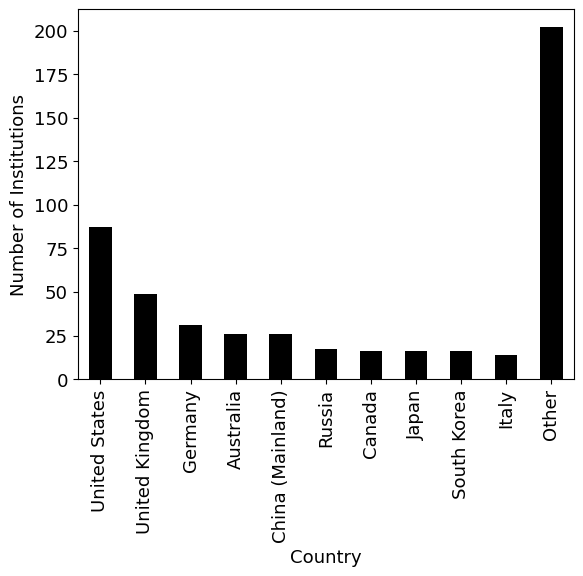</div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

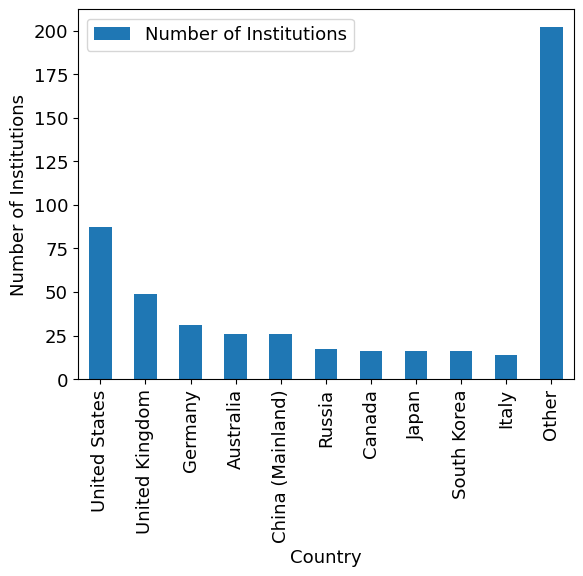

In [128]:
# create the bar plot using the DataFrame 'num_institutions' with the x-axis labelled "Country" 
# and the y-axis labelled "Number of Institutions"
bar_plot(num_institutions, x = "Country", y = "Number of Institutions")

**Question 6:** Create a **bar plot** of the **top** *10* countries with the **highest** *total* `Overall` listed in the `year` *2022*.

The `Total Score` of a `Country` is defined as the **sum** of `Overall` of **all** institutions in that `Country`. You **must** display the columns `Country` and `Total Score`. The rows **must** be in *descending* order of `Total Score`.

You **must** first compute a **DataFrame** `top_10_total_score` containing the **Country**, and the **Total Score** data.

Your **DataFrame** should looks like this:

||**Country**|**Total Score**|
|---|---|---|
|**0**|United States|4441.9|
|**1**|United Kingdom|2543.8|
|**2**|Australia|1243.3|
|**3**|Germany|1235.3|
|**4**|China (Mainland)|1138.5|
|**5**|Japan|796.3|
|**6**|Canada|785.6|
|**7**|South Korea|739.1|
|**8**|Netherlands|673.6|
|**9**|Russia|582.6|

In [129]:
# compute and store the answer in the variable 'top_10_total_score', then display it
# do NOT plot just yet
top_10_total_score = pd.read_sql(""" SELECT `Country`, SUM(`Overall`) AS `Total Score`
                                    FROM rankings
                                    WHERE `Year` == 2022
                                    GROUP BY `Country`
                                    ORDER BY `Total Score` desc
                                    LIMIT 10
                                    
                                    """, conn)

top_10_total_score

,Country,Total Score
0,United States,4441.9
1,United Kingdom,2543.8
2,Australia,1243.3
3,Germany,1235.3
4,China (Mainland),1138.5
5,Japan,796.3
6,Canada,785.6
7,South Korea,739.1
8,Netherlands,673.6
9,Russia,582.6


In [130]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q6 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q6 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bar_plot` function is not used to plot (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q6 - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `top_10_total_score` as **bar plot** with the **x-axis** labelled *Country* and the **y-axis** labelled *Total Score*.

You **must** use the `bar_plot` function to create the plot.

**Important Warning:** `public_tests.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>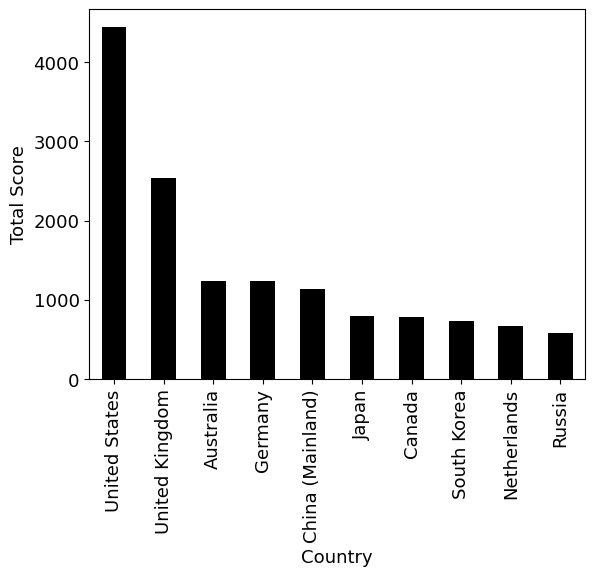</div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

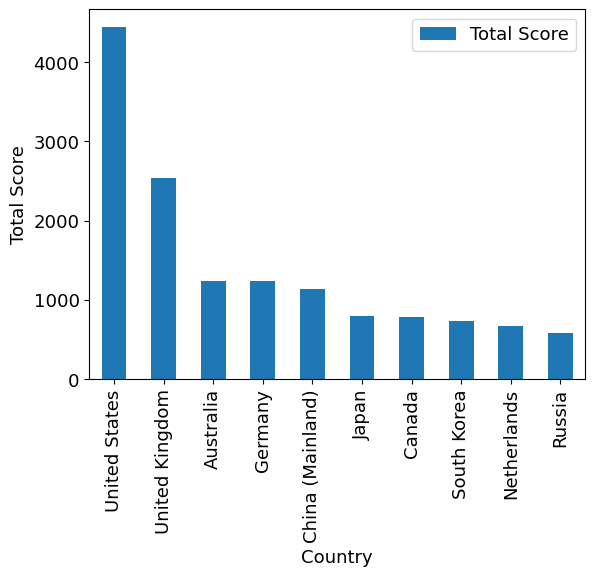

In [131]:
# create the bar plot using the DataFrame 'top_10_total_score' with the x-axis labelled "Country" 
# and the y-axis labelled "Total Score"
bar_plot(top_10_total_score, x = "Country", y = "Total Score")

**Question 7:** What are the **top** *10* institutions in the *United States* which had the **highest** *International Score* in the `year` *2024*?

The *International Score* of an institution is defined as the **sum** of `International Faculty` and `International Students` scores of that institution. You **must** display the columns `Institution Name` and `International Score`. The rows **must** be in *descending* order of `International Score`.

Your output **must** be a **DataFrame** that looks like this:

||**Institution Name**|**International Score**|
|---|---|---|
|**0**|Massachusetts Institute of Technology (MIT) |188.2|
|**1**|Rice University|185.8|
|**2**|California Institute of Technology (Caltech)|181.0|
|**3**|Yale University|168.6|
|**4**|University of Pennsylvania|166.3|
|**5**|University of Chicago|165.6|
|**6**|University of Rochester|163.1|
|**7**|University of California, Berkeley (UCB)|156.1|
|**8**|Johns Hopkins University|155.8|
|**9**|Northeastern University|154.5|

In [143]:
# compute and store the answer in the variable 'top_10_inter_score', then display it
top_10_inter_score = pd.read_sql(""" SELECT `Institution Name`, (`International Faculty` + `International Students`) AS `International Score`
                                    FROM rankings
                                    WHERE `Year` == 2024 and `Country` == "United States"
                                    
                                    ORDER BY `International Score` desc
                                    LIMIT 10
                                    
                                    """, conn)


top_10_inter_score

,Institution Name,International Score
0,Massachusetts Institute of Technology (MIT),188.2
1,Rice University,185.8
2,California Institute of Technology (Caltech),181.0
3,Yale University,168.6
4,University of Pennsylvania,166.3
5,University of Chicago,165.6
6,University of Rochester,163.1
7,"University of California, Berkeley (UCB)",156.1
8,Johns Hopkins University,155.8
9,Northeastern University,154.5


In [144]:
grader.check("q7")

q7 results: All test cases passed!
q7 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q7 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 8:** Create a **scatter plot** representing the `Citations per Faculty` (on the **x-axis**) against the `Overall` (on the **y-axis**) of each institution in the `Year` *2024*.

You **must** first compute a **DataFrame** `citations_overall` containing the **Citations per Faculty**, and the **Overall** data from the `Year` *2024*, of each **institution**.

In [149]:
# first compute and store the DataFrame 'citations_overall', then display its head
# do NOT plot just yet
citations_overall = pd.read_sql(""" SELECT `Citations per Faculty`, `Overall`
                                    FROM rankings
                                    WHERE `Year` == 2024
                                    
                                    
                                   
                                    """, conn)


citations_overall.head()

,Citations per Faculty,Overall
0,100.0,100.0
1,92.3,99.2
2,90.6,98.9
3,100.0,98.3
4,99.9,98.1


In [150]:
grader.check("q8")

q8 results: All test cases passed!
q8 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q8 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q8 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`scatter_plot` function is not used to plot (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q8 - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `citations_overall` as **scatter plot** with the **x-axis** labelled *Citations per Faculty* and the **y-axis** labelled *Overall*.

You **must** use the `scatter_plot` function to create the plot.

**Important Warning:** `public_tests.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>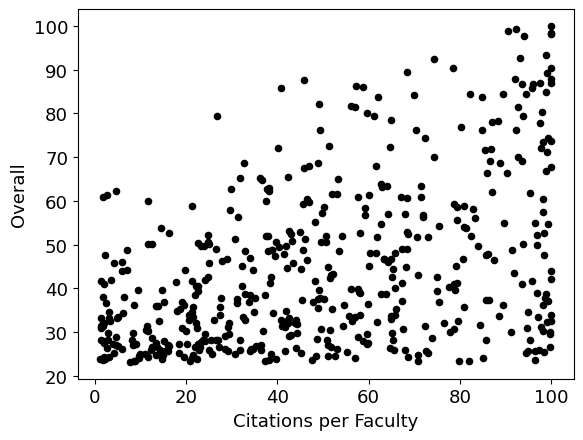</div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

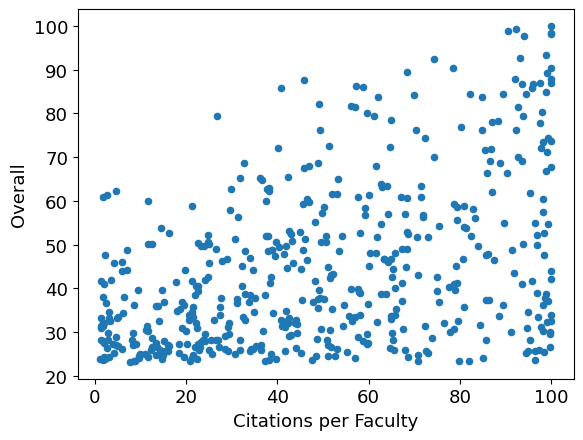

In [151]:
# create the scatter plot using the DataFrame 'citations_overall' with the x-axis labelled "Citations per Faculty" 
# and the y-axis labelled "Overall"
scatter_plot(citations_overall, x = "Citations per Faculty", y = "Overall")

**Question 9:** Create a **scatter plot** representing the `Academic Reputation` (on the **x-axis**) against the `Employer Reputation` (on the **y-axis**) of each institution from the *United States* in the `year` *2023*.

You **must** first compute a **DataFrame** `reputations_usa` containing the **Academic Reputation**, and the **Employer Reputation** data from the `Year` *2023*, of each **institution** in the `Country` *United States*.

In [154]:
# first compute and store the DataFrame 'reputations_usa', then display its head
# do NOT plot just yet
reputations_usa = pd.read_sql(""" SELECT `Academic Reputation`, `Employer Reputation`
                                    FROM rankings
                                    WHERE `Year` == 2023 and `Country` = "United States"
                                    
                                    
                                   
                                    """, conn)

reputations_usa.head()

,Academic Reputation,Employer Reputation
0,100.0,100.0
1,100.0,100.0
2,100.0,100.0
3,96.5,87.1
4,99.2,92.2


In [155]:
grader.check("q9")

q9 results: All test cases passed!
q9 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q9 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q9 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`scatter_plot` function is not used to plot (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q9 - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `reputations_usa` as **scatter plot** with the **x-axis** labelled *Academic Reputation* and the **y-axis** labelled *Employer Reputation*.

You **must** use the `scatter_plot` function to create the plot.

**Important Warning:** `public_tests.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>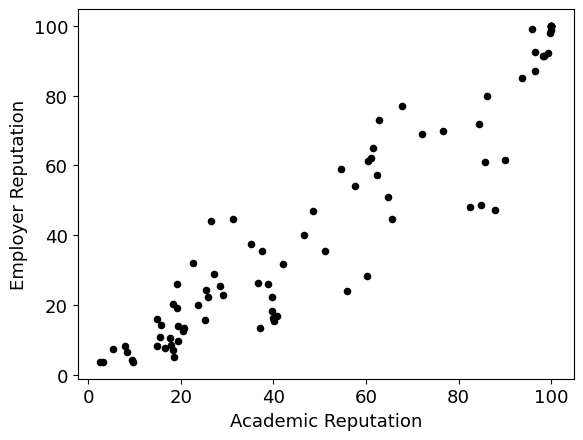</div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

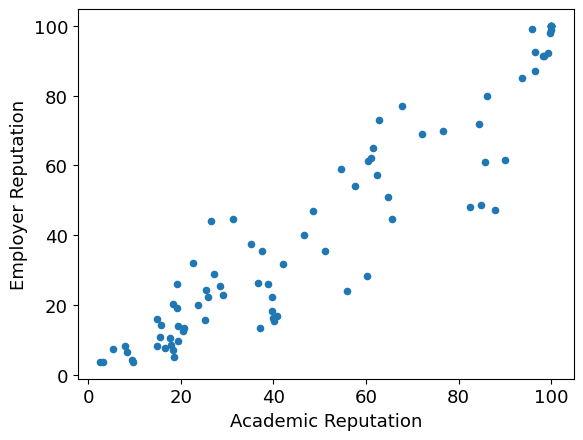

In [156]:
# create the scatter plot using the DataFrame 'reputations_usa' with the x-axis labelled "Academic Reputation" 
# and the y-axis labelled "Employer Reputation"
scatter_plot(reputations_usa, "Academic Reputation", "Employer Reputation")

**Question 10:** Create a **scatter plot** representing the `International Students` (on the **x-axis**) against the `Faculty Student` (on the **y-axis**) for the **top ranked** institution of **each** `Country` in the `Year` *2023*.

You **must** first compute a **DataFrame** `top_ranked_inter_faculty` containing the **International Students**, and the **Faculty Student** data from the `Year` *2023*, of the **top** ranked **institution** (i.e., the institution with the **least** `rank`) of each **country**.

**Hint:** You can use the `MIN` SQL function to return the least value of a selected column. However, there are a few things to keep in mind while using this function.
* The function must be in **uppercase** (i.e., you must use `MIN`, and **not** `min`).
* The column you are finding the minimum of must be inside backticks (``` ` ```). For example, if you want to find the minimum `Rank`, you need to say ```MIN(`Rank`)```.

If you do not follow the syntax above, your code will likely fail.

In [157]:
# first compute and store the DataFrame 'top_ranked_inter_faculty', then display its head
# do NOT plot just yet
top_ranked_inter_faculty = pd.read_sql(""" SELECT `International Students`, `Faculty Student`
                                    FROM rankings
                                    WHERE `Year` == 2023
                                    GROUP BY `Country`
                                    HAVING MIN(`Rank`)
                                    
                                   
                                    """, conn)
top_ranked_inter_faculty.head()

,International Students,Faculty Student
0,68.9,76.0
1,96.0,38.0
2,89.2,24.2
3,48.2,96.8
4,43.3,7.7


In [158]:
grader.check("q10")

q10 results: All test cases passed!
q10 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q10 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q10 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`scatter_plot` function is not used to plot (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q10 - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `top_ranked_inter_faculty` as **scatter plot** with the **x-axis** labelled *International Students* and the **y-axis** labelled *Faculty Student*.

You **must** use the `scatter_plot` function to create the plot.

**Important Warning:** `public_tests.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>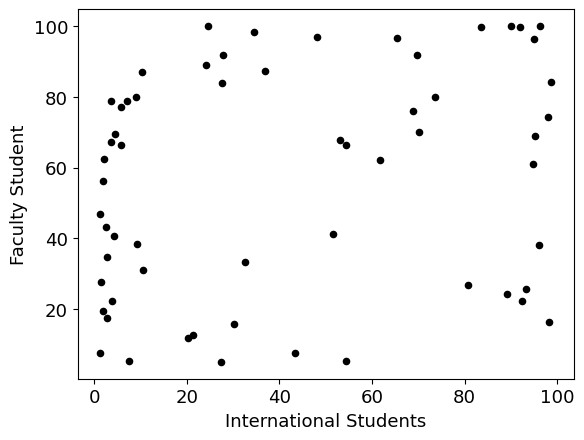</div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

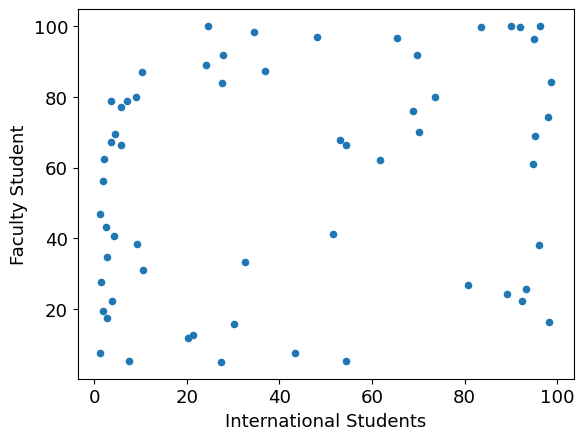

In [159]:
# create the scatter plot using the DataFrame 'top_ranked_inter_faculty' with the x-axis labelled "International Students" 
# and the y-axis labelled "Faculty Student"
scatter_plot(top_ranked_inter_faculty, "International Students", "Faculty Student")

### Correlations:

You can use the `.corr()` method on a **DataFrame** that has **two** columns to get the *correlation* between those two columns.

For example, if we have a **DataFrame** `df` with the two columns `Citations per Faculty` and `Overall`, `df.corr()` would return

||**Citations per Faculty**|**Overall**|
|---------|------|---------|
|Citations per Faculty|1.000000|0.617044|
|Overall|0.617044|1.000000|

You can use `.loc` here to **extract** the *correlation* between the two columns (`0.617044` in this case).

**Question 11:** Find the **correlation** between `International Students` and `Overall` for institutions from the `Country` *United Kingdom* that were ranked in the **top** *100* in the `year` *2022*.

Your output **must** be a **float** representing the absolute correlation. The **only** `pandas` operations you are **allowed** to use are: `.corr`, `.loc` and `.iloc`. You **must** use SQL to gather all other data.

In [169]:
# compute and store the answer in the variable 'uk_inter_score_corr', then display it
uk_inter_score_corr = pd.read_sql(""" SELECT `International Students`, `Overall`
                                    FROM rankings
                                    WHERE `Year` == 2022 and `Country` = "United Kingdom"
                                    LIMIT 100
                                    """,conn).corr().iloc[0][1]


uk_inter_score_corr

0.4719859189929482

In [170]:
grader.check("q11")

q11 results: All test cases passed!
q11 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q11 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Let us now define a new score called `Citations per International` as follows:

$$\texttt{Citations per International} = \frac{\texttt{Citations per Faculty} \times \texttt{International Faculty}}{100}.$$


**Question 12:** Find the **correlation** between `Citations per International` and `Overall` for **all** institutions in the `year` *2024*.

Your output **must** be a **float** representing the absolute correlation. The **only** `pandas` operations you are **allowed** to use are: `.corr`, `.loc` and `.iloc`. You **must** use SQL to gather all other data.

In [173]:
# compute and store the answer in the variable 'cit_per_inter_score_corr', then display it
cit_per_inter_score_corr = pd.read_sql(""" SELECT ((`Citations per Faculty` * `International Faculty`)/100), `Overall`
                                    FROM rankings
                                    WHERE `Year` == 2024
                                    
                                    """,conn).corr().iloc[0][1]


cit_per_inter_score_corr

0.5943163420092246

In [174]:
grader.check("q12")

q12 results: All test cases passed!
q12 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q12 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 13:** What are the **top** *15* countries with the **highest** *total* of `Citations per International` in the `Year` *2024*.

The *total* `Citations per International` of a `Country` is defined as the **sum** of `Citations per International` scores of **all** institutions in that `Country`. You **must** display the columns `Country` and `Sum of International Citations`. The rows **must** be in *descending* order of `Sum of International Citations`.

Your output **must** be a **DataFrame** that looks like this:

||**Country**|**Sum of International Citations**|
|---|---|---|
|**0**|United States|2294.2671|
|**1**|United Kingdom|2279.9530|
|**2**|Australia|1895.6595|
|**3**|Canada|822.9573|
|**4**|Netherlands|749.9450|
|**5**|Switzerland|664.2349|
|**6**|Germany|635.0223|
|**7**|China (Mainland)|578.7473|
|**8**|Hong Kong SAR|513.1582|
|**9**|France|385.9691|
|**10**|Sweden|382.8463|
|**11**|New Zealand|344.3393|
|**12**|Belgium|300.6716|
|**13**|Denmark|217.8851|
|**14**|Finland|210.7134|

In [175]:
# compute and store the answer in the variable 'top_cit_per_inter', then display it
top_cit_per_inter = pd.read_sql(""" SELECT `Country`, SUM((`Citations per Faculty` * `International Faculty`)/100) as "Sum of International Citations"
                                    FROM rankings
                                    WHERE `Year` == 2024
                                    GROUP BY `Country`
                                    ORDER BY "Sum of International Citations" desc
                                    LIMIT 15
                                    """,conn)

top_cit_per_inter

,Country,Sum of International Citations
0,United States,2294.2671
1,United Kingdom,2279.9530
2,Australia,1895.6595
3,Canada,822.9573
4,Netherlands,749.9450
5,Switzerland,664.2349
6,Germany,635.0223
7,China (Mainland),578.7473
8,Hong Kong SAR,513.1582
9,France,385.9691


In [176]:
grader.check("q13")

q13 results: All test cases passed!
q13 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q13 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 14:** Among the institutions ranked within the **top** *300*  in the `Year` *2023*, find the **average** `Citations per International` for **each** `Country`.

You **must** display the columns `Country` and `Average Citations per International` representing the **average** of `Citations per International` for **each** `Country`. The rows **must** be in *descending* order of `Average Citations per International`. You **must** **omit** rows where `Citations per International` and `International Faculty` columns are **missing** by using the clause:

```sql
WHERE (`Citations per Faculty` IS NOT NULL AND `International Faculty` IS NOT NULL)
```


**Hint:** To find the **average**, you can use `SUM()` and `COUNT()` or you can simply use `AVG()`.

Your output **must** be a **DataFrame** whose **first ten rows** look like this:

||**Country**|**Average Citations per International**|
|---|---|---|
|**0**|Singapore|92.950000|
|**1**|Australia|82.001726|
|**2**|Hong Kong SAR|78.318000|
|**3**|Switzerland|78.004875|
|**4**|Netherlands|58.039117|
|**5**|United Kingdom|56.838479|
|**6**|Sweden|52.991567|
|**7**|Canada|48.342191|
|**8**|Denmark|47.686267|
|**9**|Belgium|47.580433|

In [182]:
# compute and store the answer in the variable 'avg_cit_per_inter', then display it
avg_cit_per_inter = pd.read_sql(""" SELECT `Country`, AVG((`Citations per Faculty` * `International Faculty`)/100) as "Average Citations per International"
                                    FROM rankings
                                    WHERE `Year` == 2023 and `Rank` <= 300 and (`Citations per Faculty` IS NOT NULL AND `International Faculty` IS NOT NULL)
                                    GROUP BY `Country`
                                    ORDER BY "Average Citations per International" desc
                                    LIMIT 300
                                    """,conn)

avg_cit_per_inter

,Country,Average Citations per International
0,Singapore,92.950000
1,Australia,82.001726
2,Hong Kong SAR,78.318000
3,Switzerland,78.004875
4,Netherlands,58.039117
5,United Kingdom,56.838479
6,Sweden,52.991567
7,Canada,48.342191
8,Denmark,47.686267
9,Belgium,47.580433


In [183]:
grader.check("q14")

q14 results: All test cases passed!
q14 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q14 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 15** Find the **institution** with the **highest** value of `Citations per International` for **each** `Country` in the `Year` *2024*.

Your output **must** be a **DataFrame** with the columns `Country`, `Institution Name`, and a new column `Maximum Citations per International` representing the **maximum** value of `Citations per International` for that country. The rows **must** be in *descending* order of `Maximum Citations per International`. You **must** **omit** rows where `Maximum Citations per International` is **missing** by using the clause:

```sql
HAVING `Maximum Citations per International` IS NOT NULL
```

**Hint:** You can use the `MAX()` function to return the largest value within a group.

Your output **must** be a **DataFrame** whose **first ten rows** look like this:

||**Country**|**Institution Name**|**Maximum Citations per International**|
|---|---|---|---|
|**0**|United States|Massachusetts Institute of Technology (MIT) |100.0000|
|**1**|Hong Kong SAR|City University of Hong Kong|99.9000|
|**2**|Switzerland|University of Bern|99.2000|
|**3**|Australia|The University of Western Australia|98.9000|
|**4**|Canada|Western University|98.0051|
|**5**|Macau SAR|University of Macau|96.9000|
|**6**|China (Mainland)|Zhejiang University|95.3552|
|**7**|Singapore|Nanyang Technological University, Singapore (NTU)|94.4000|
|**8**|United Kingdom|Imperial College London|94.0000|
|**9**|France|Institut Polytechnique de Paris|92.3930|

In [187]:
# compute and store the answer in the variable 'max_cit_per_inter', then display it
max_cit_per_inter = pd.read_sql(""" SELECT `Country`, `Institution Name`, MAX((`Citations per Faculty` * `International Faculty`)/100) as "Maximum Citations per International"
                                    FROM rankings
                                    WHERE `Year` == 2024
                                    GROUP BY `Country`
                                    HAVING `Maximum Citations per International` IS NOT NULL
                                    ORDER BY "Maximum Citations per International" desc
                                    
                                    """,conn)

max_cit_per_inter

,Country,Institution Name,Maximum Citations per International
0,United States,Massachusetts Institute of Technology (MIT),100.0000
1,Hong Kong SAR,City University of Hong Kong,99.9000
2,Switzerland,University of Bern,99.2000
3,Australia,The University of Western Australia,98.9000
4,Canada,Western University,98.0051
5,Macau SAR,University of Macau,96.9000
6,China (Mainland),Zhejiang University,95.3552
7,Singapore,"Nanyang Technological University, Singapore (NTU)",94.4000
8,United Kingdom,Imperial College London,94.0000
9,France,Institut Polytechnique de Paris,92.3930


In [188]:
grader.check("q15")

q15 results: All test cases passed!
q15 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q15 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 16**: Among the institutions ranked within the **top** *50*  in the `Year` *2022*, create a **horizontal bar plot** representing the **average** of both the`Citations per Faculty` and `International Faculty` scores for **all** institutions in **each** `Country`.

You **must** first create a **DataFrame** `country_citations_inter` with **three** columns: `Country`, `Average Citations per Faculty` and `Average International Faculty` representing the name, the average value of `Citations per Faculty` and the average value of `International Faculty` for each country respectively.

You **must** ensure that the countries in the **DataFrame** are **ordered** in **increasing** order of the **difference** between the `Average Citations per Faculty` and `Average International Faculty`.

In [198]:
# first compute and store the DataFrame 'country_citations_inter', then display it
# do NOT plot just yet
country_citations_inter = pd.read_sql(""" SELECT `Country`, AVG(`Citations per Faculty`) as "Average Citations per Faculty", AVG(`International Faculty`) as "Average International Faculty" 
                                    FROM rankings
                                    WHERE `Year` == 2022 and `Rank` <= 50
                                    GROUP BY `Country`
                                    ORDER BY (`Average Citations per Faculty` - `Average International Faculty`) asc
                                    
                                    """,conn)


country_citations_inter

,Country,Average Citations per Faculty,Average International Faculty
0,Canada,57.033333,93.3000
1,Germany,27.200000,56.9000
2,United Kingdom,77.937500,98.9375
3,Hong Kong SAR,81.166667,100.0000
4,Australia,91.180000,99.4200
5,Singapore,93.050000,100.0000
6,France,73.350000,75.9000
7,Switzerland,99.800000,100.0000
8,United States,83.700000,65.9000
9,China (Mainland),84.240000,55.5400


In [199]:
grader.check("q16")

q16 results: All test cases passed!
q16 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q16 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q16 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`horizontal_bar_plot` function is not used to plot (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q16 - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `country_citations_inter` as **horizontal bar plot** with the **x-axis** labelled *Country*.

You **must** use the `horizontal_bar_plot` function to plot this data. Verify that the countries are **ordered** in **decreasing** order of the **difference** between `Average Citations per Faculty` and `Average International Faculty`. Verify that the **legend** appears on your plot.

**Hint:** If you want the countries in the plot to be ordered in **decreasing** order of the difference, you will need to make sure that in the DataFrame, they are ordered in the **increasing** order.

**Important Warning:** `public_tests.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>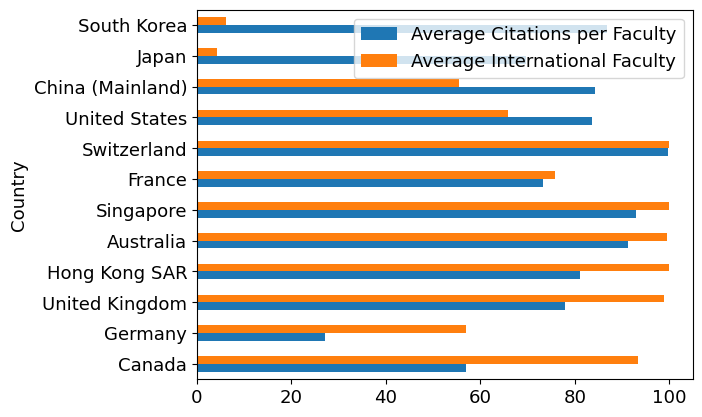</div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

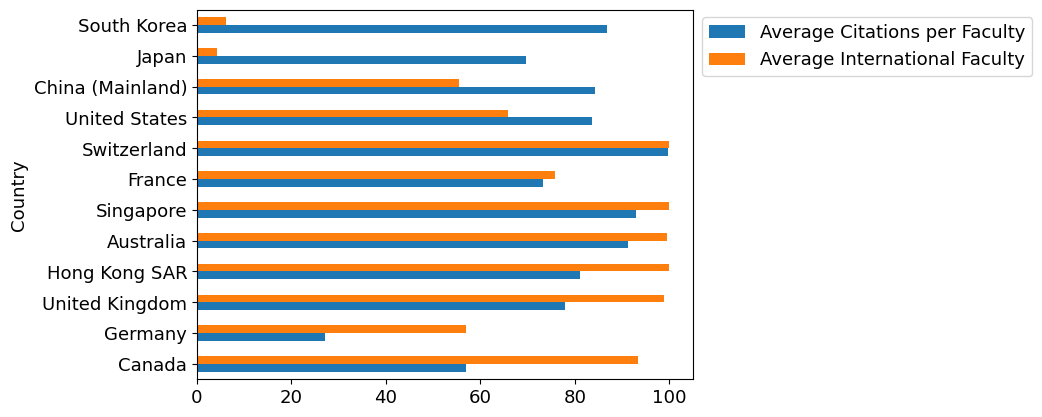

In [197]:
# create the horizontal bar plot using the DataFrame 'country_citations_inter' with the x-axis labelled "Country" 
horizontal_bar_plot(country_citations_inter, "Country")

**Question 17:** Create a **scatter plot** representing the `Overall` (on the **x-axis**) against the `Rank` (on the **y-axis**) for **all** institutions in the `Year` *2022*. Additionally, **plot** a **regression line** within the same plot.

You **must** first compute a **DataFrame** containing the **Overall**, and the **Rank** data from the `Year` *2022*. You **must** use the `get_regression_line` function to compute the best fit line.

In [209]:
# first compute and store the DataFrame 'overall_rank', then display its head
# do NOT plot just yet
overall_rank = pd.read_sql("""SELECT `Overall`, `Rank`
                            FROM rankings
                            where `Year` = 2022
                            
                            
                            """, conn)

get_regression_line(overall_rank, "Overall", "Rank")
overall_rank.head()

,Overall,Rank,1,fit
0,100.0,1,1,-142.320024
1,99.5,2,1,-138.773723
2,98.7,3,1,-133.099642
3,98.7,3,1,-133.099642
4,98.0,5,1,-128.134821


In [210]:
grader.check("q17")

q17 results: All test cases passed!
q17 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not use SQL to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q17 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q17 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`regression_line_plot` function is not used to plot (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q17 - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `overall_rank` as **scatter plot** with a **regression line** with the **x-axis** labelled *Overall* and the **y-axis** labelled *Rank*.

You **must** use the `regression_line_plot` function to plot this data.

**Important Warning:** `public_tests.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>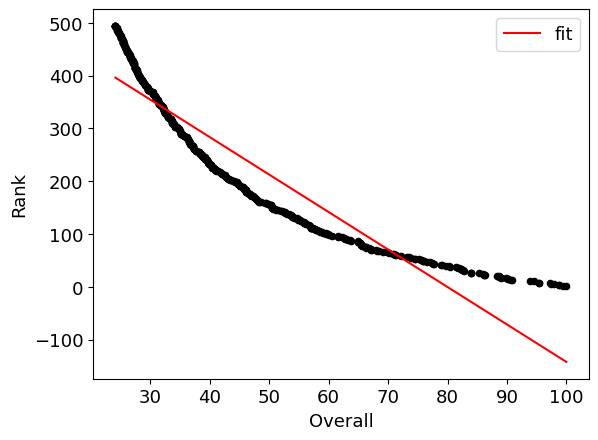</div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

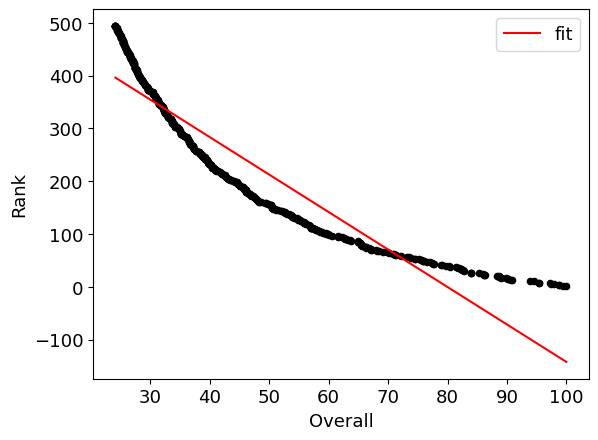

In [211]:
# create the scatter plot and the regression line using the DataFrame 'overall_rank' with the x-axis labelled "Overall" 
# and the y-axis labelled "Rank"
regression_line_plot(overall_rank, "Overall","Rank")

**Food for thought:** Does our linear regression model fit the points well? It looks like the relationship between the `Overall` and `Rank` is **not quite linear**. In fact, a cursory look at the data suggests that the relationship is in fact, inverse.

In [66]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


**Question 18:** Create a **scatter plot** representing the **inverse** of the `Overall` (on the **x-axis**) against the `Rank` (on the **y-axis**) for **all** institutions in the `Year` *2022*. Additionally, **plot** a **regression line**  within the same plot.

The `Inverse Overall` for each institution is simply defined as `1/Overall` for that institution. You **must** first compute a **DataFrame** containing the **Inverse Overall**, and the **Rank** data from the `Year` *2022*. You **must** use the `get_regression_line` function to compute the best fit line.

In [214]:
# first compute and store the DataFrame 'inverse_overall_rank', then display its head
# do NOT plot just yet
inverse_overall_rank = pd.read_sql("""SELECT 1/`Overall` AS "Inverse Overall", `Rank`
                                    from rankings
                                    WHERE `Year` == 2022
                                    
                                    
                                    """,conn)

get_regression_line(inverse_overall_rank, "Inverse Overall", "Rank")

inverse_overall_rank.head()

,Inverse Overall,Rank,1,fit
0,0.010000,1,1,-3.168433
1,0.010050,2,1,-2.371054
2,0.010132,3,1,-1.078443
3,0.010132,3,1,-1.078443
4,0.010204,5,1,0.069903


In [215]:
grader.check("q18")

q18 results: All test cases passed!
q18 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q18 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`get_regression_line` function is not used to answer (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q18 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`regression_line_plot` function is not used to plot (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q18 - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `inverse_overall_rank` as **scatter plot** with a **regression line** with the **x-axis** labelled *Inverse Overall* and the **y-axis** labelled *Rank*.

You **must** use the `regression_line_plot` function to plot this data.

**Important Warning:** `public_tests.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>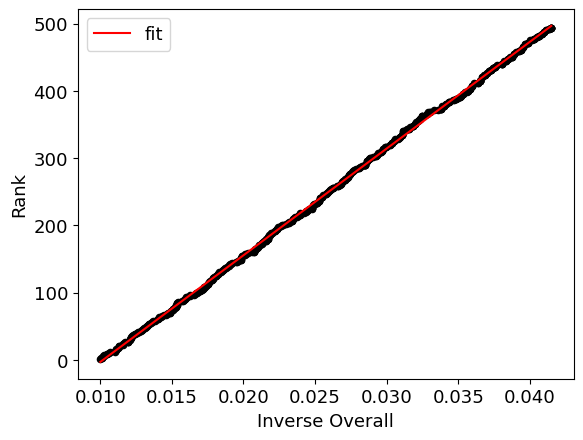</div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

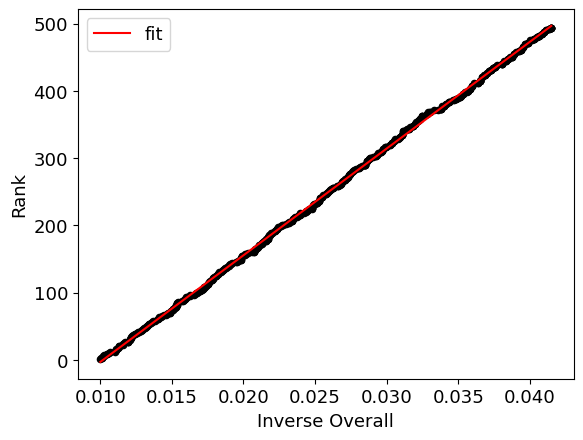

In [216]:
# create the scatter plot and the regression line using the DataFrame 'inverse_overall_rank'
# with the x-axis labelled "Inverse Overall" and the y-axis labelled "Rank"
regression_line_plot(inverse_overall_rank, "Inverse Overall", "Rank")

This seems to be much better! Let us now use this **regression line** to **estimate** the `Rank` of an institution given its `Overall`.

**Question 19:** Use the regression line to **estimate** the `Rank` of an institution with an `Overall` of *72*.

Your output **must** be an **int**. If your **estimate** is a **float**, *round it up* using `math.ceil`.


**Hints:**
1. Call the `get_regression_coeff` function to get the coefficients `m` and `b`.
2. Recall that the equation of a line is `y = m * x + b`. What are `x` and `y` here?

In [226]:
# compute and store the answer in the variable 'rank_score_72', then display it
stuff = get_regression_coeff(inverse_overall_rank, "Inverse Overall", "Rank")


rank_score_72 = math.ceil((stuff[0]/72 + stuff[1]))
rank_score_72

59

In [227]:
grader.check("q19")

q19 results: All test cases passed!
q19 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q19 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`get_regression_coeff` function is not used to answer (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Food for thought:** Can you find out the `Overall` of the university with this `Rank` in the `Year` *2022*? Does it match your prediction?

In [228]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


**Question 20:** Using the data from Question 5, create a **pie plot** representing the number of institutions from each country.

You **have** already computed a **DataFrame** `num_institutions` (in Question 5) containing the **Country**, and the **Number of Insititutions** data. Run the following cell just to confirm that the variable has not changed its values since you defined it in Question 5.

In [229]:
grader.check("q20")

q20 results: All test cases passed!
q20 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`pie_plot` function is not used to plot (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q20 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `num_institutions` as **pie plot** with the **title** *Number of Institutions*.

You **must** use the `pie_plot` function to create the **pie plot**. The **colors** do **not** matter, but the plot **must** be titled `Number of Institutions`, and **must** be labelled as in the sample output below.

**Important Warning:** `public_tests.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

<div>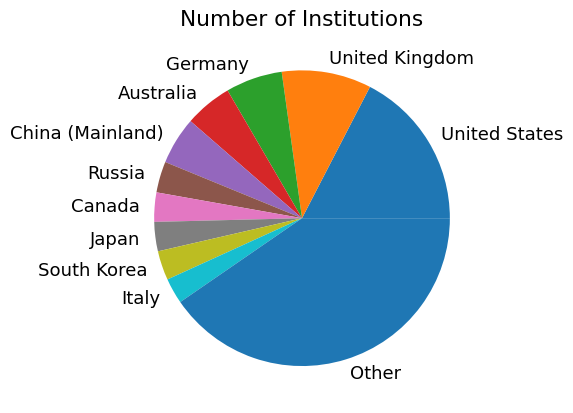</div>

<center> <b>Delete</b> this cell before you submit the notebook to reduce the size of your file.</center>

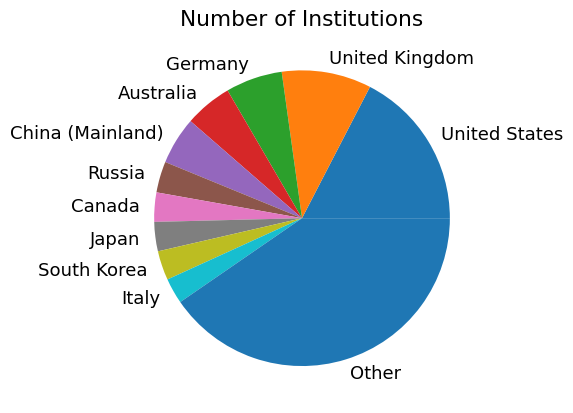

In [230]:
# create the pie plot using the DataFrame 'num_institutions' titled "Number of Institutions"
pie_plot(num_institutions, x = "Country", y= "Number of Institutions", title = "Number of Institutions")

**Food for thought:** It seems that we'll run out of colors! How can we make it so that **no two neighbors share a color**? You'll probably have to look online.

In [75]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


### Closing the database connection:

Now, before you **submit** your notebook, you **must** **close** your connection `conn`. Not doing this might make **Gradescope fail**. Additionally, **delete** the example images provided with plot questions to save space, if your notebook file is too large for submission. You can **delete** any cell by selecting the cell, hitting the `Esc` key once, and then hitting the `d` key **twice**.

In [231]:
# close your connection here
conn.close()

In [232]:
grader.check("general_deductions")

general_deductions results: All test cases passed!
general_deductions - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Outputs not visible/did not save the notebook file prior to running the cell containing "export". We cannot see your output if you do not save before generating the zip file. (-3)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Import statements are not mentioned in the required cell at the top of the notebook. (-3)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [233]:
grader.check("summary")

summary results: All test cases passed!

## Submission
It is recommended that at this stage, you Restart and Run all Cells in your notebook.
That will automatically save your work and generate a zip file for you to submit.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. If you completed the project with a **partner**, make sure to **add their name** by clicking "Add Group Member"
in Gradescope when uploading the zip file.
3. Check **Gradescope** results as soon as the auto-grader execution gets completed.
4. Your **final score** for this project is the score that you see on **Gradescope**.
5. You are **allowed** to resubmit on Gradescope as many times as you want to.
6. **Contact** a TA/PM if you lose any points on Gradescope for any **unclear reasons**.

In [234]:
# running this cell will create a new save checkpoint for your notebook
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>

In [235]:
!jupytext --to py p13.ipynb

[jupytext] Reading p13.ipynb in format ipynb
[jupytext] Writing p13.py (destination file replaced)


In [236]:
public_tests.check_file_size("p13.ipynb")
grader.export(pdf=False, run_tests=False, files=["p13.py"])

AssertionError: Your file is too big to be displayed by Gradescope; please delete unnecessary output cells so your file size is < 750 KB